# Fraude nas Eleições?

Após escultar o podcast [**Naruhodo #154**](https://www.b9.com.br/98315/naruhodo-154-o-que-e-a-lei-de-benford/), soube que um vídeo ficou popular falando sobre [possíveis fraudes nas eleições de 2014](https://www.youtube.com/watch?v=FgpYrXN00Sw&ab_channel=BrasilParalelo). Motivado pela discussão do episódio, fui mais a fundo no assunto. 
No vídeo, apesar das acusações, o estudo divulgado não é detalhado. Ou seja, a metodologia usada para encontrar os resultados não está disponível (pública). Portanto, não podemos ter a replicabilidade exata dos resultados (ou conferí-los). 

Após algumas leituras sobre a utilização da **Lei de Benford na auditação de eleições** <sup>[[1]](https://web.archive.org/web/20140517120934/http://vote.caltech.edu/sites/default/files/benford_pdf_4b97cc5b5b.pdf) [[2]](https://aip.scitation.org/doi/10.1063/1.166498) [[3]](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00919.x)</sup>, vi que a sua utilização é no mínimo questionável. Como o vídeo não traz um estudo em sí, apenas os resultados tentarei replicá-los baseando-me apenas na aplicação da Lei de Benford. Os dados analizá-dos serão os das eleições para presidente de 2014. 
___



## O que é a Lei de Benford?
A lei de Benford ou lei do primeiro dígito é uma observação da distribuição de dígitos presente em várias conjuntos de números reais. Simplificadamente, a **lei diz que o primeiro dígito significante é provavelmente pequeno**. Esse [vídeo](https://www.youtube.com/watch?v=XXjlR2OK1kM&ab_channel=Numberphile) do [Numberphille](https://www.youtube.com/channel/UCoxcjq-8xIDTYp3uz647V5A) traz uma ótima explicação sobre o assunto.

Matematicamente, a Lei de Benford diz que probabilidade da ocorrencia do dígito $n$ na primeira posição em uma conjunto de números segue a seguinte equação:

$$
P(n) = \log_{10}\left(1 + \frac{1}{n}\right)
$$

Por exemplo, a distribuição dos primeiro dígito da população de 237 países em Julho de 2010, indica uma distribuição que segue a Lei de Benford.

![Fonte: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/0/0b/Benfords_law_illustrated_by_world%27s_countries_population.png "Fonte: https://en.wikipedia.org/wiki/Benford%27s_law")

### Restrições
Apesar de vários conjuntos de dados seguirem essa distribuição, exitem algumas condições.

- Os dados devem abrangir várias ordens de magnitude de maneira **relativamente** uniforme.
- **Flutuações multiplicativas** geram essa distribuição (sequencia de produtos de probabilidades)



___
# Aplicando a Lei de Benford

Vamos aplicar a lei em alguns dados públicos e verificar sua eficácia. Ao todo realizaremos um total de 3 exemplos, e o passo-a-passo abaixo mostra o as etapas da análise de cada exemplo.
- **Visualização**
- **Limpeza/Filtragem**
- **Análise**
- **Métricas**
- **Resultados**


Antes de prosseguirmos nas análise, vamos garantir que algumas bibliotecas necessárias estão atualizadas e algumas configurações feitas.


In [0]:

# Atualizar/ Instala os packages
!pip install seaborn --upgrade
!pip install pandas --upgrade
!pip install numpy --upgrade
!pip install matplotlib --upgrade

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Configurações de exibição
pd.set_option('display.max_columns', 6)
# Future Wanrning in Numpy
np.warnings.filterwarnings('ignore')


## 1. Dados de Eleitores por Município
Primeiro, vamos verificar se a quantidade de eleitores por município segue o padrão descrito na lei de Benford. É uma estimativa razoável, já que a quantidade de eleitores é proporcional a de habitantes, e já vimos que populações seguem esse padrão. Os dados usados nessa análise foram retirados dos site do [TSE](http://www.tse.jus.br/eleitor/estatisticas-de-eleitorado/quantitativo-do-eleitorado) dia 27 de Outubro de 2018 e correspondem a **quantidade de eleitores por município em 2014**.

### Visualização
Primeiro, vamos **importar os dados do TSE** e dá uma olhada neles.


In [24]:
# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/eleitorado_municipio_2014.csv"
eleitores = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

def visualizar(df):
    # Mostra as primeiras linhas dos dados
    display(df.head())

visualizar(eleitores)

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,...,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
0,2014,1,Brasil,...,9087,12,0
1,2014,1,Brasil,...,26,10,0
2,2014,1,Brasil,...,16992,22,0
3,2014,1,Brasil,...,16,7,0
4,2014,1,Brasil,...,6887,23,0


### Limpeza/Filtragem

Já podemos perceber que temos 5738 de municípios de votação (Incluindo Exterior). Caso queira ter uma melhor descrição dos valores desse arquivo dê uma olhada no arquivo "**Descricao_dados.pdf**" incluso nesse repositório.

A coluna que nos iteressa é:
 - **QTD_ELEITORES**: Quantidade de eleitores por município.

In [25]:
def filter_and_clean(df, col):
    """
    Filtra e limpa os dados, em seguida mostra o resultado final.
    """
    # Filtra os dados
    df = df[[col]]
    df = df.dropna()

    # Após a limpeza
    print(df.info())
    
    print("\n\n Total:" + str(df[col].astype('float64').sum()) + "\n\n")
    display(df.head(5))
    
    return df
  
col = "QTD_ELEITORES"

eleitores = filter_and_clean(eleitores, col)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5737
Data columns (total 1 columns):
QTD_ELEITORES    5738 non-null int64
dtypes: int64(1)
memory usage: 89.7 KB
None


 Total:142822046.0




,QTD_ELEITORES
0,9144
1,5189
2,17131
3,6902
4,6941


### Análise
De acordo com o [TSE](http://www.tse.jus.br/imprensa/noticias-tse/2018/Agosto/brasil-tem-147-3-milhoes-de-eleitores-aptos-a-votar-nas-eleicoes-2018), de fato, tivemos 142.822.046 eleitores em 201. Assim, podemos continuar nossa análise.
 
Antes de continuar a análise, vamos dá uma olhada na distribuição dos valores que estamos analisando, **Quantidade de Eleitores**.
 

Valor mínimo: 1.0
Valor máximo: 8782406.0


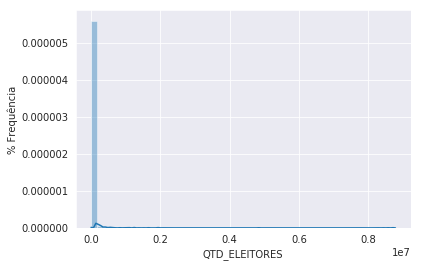

In [26]:
# Mostrar a distribuição dos dígitos
def show_dist(df, col):
  with sns.axes_style('darkgrid'):
      f, ax = plt.subplots()
      sns.distplot(df[col].astype('float64'), ax=ax)

      ax.set_ylabel("% Frequência")

  print("Valor mínimo: " + str(df[col].astype('float64').min()))
  print("Valor máximo: " + str(df[col].astype('float64').max()))
  
show_dist(eleitores, col)

Os valores possuem distribuição de cauda longa e estão definidos em um intervalo de várias ordens de grandeza $[1, 8782406]$.

Agora vamos escrever uma função que coletar as **distribuições dos dígitos presentes nesses dados**.


In [27]:
# Função que coleta a frequência dos primeiros dígitos.
def fd_freq(df, col):
    """
    Retorna a distribuição dos primeiros dígitos da coluna especificada.

    > df: DataFrame de análise
    > col: Coluna que será analisada.
    < df_freq: DataFrame com os resultados;

    """
    # lista de dígitos 1...9
    digits = [str(d) for d in range(1, 10)]
    columns = ["Ocorrências", "Porcentagem"]
    df_freq = pd.DataFrame(index=digits, columns=columns)

    # Para cada dígito
    for d in digits:
        # Total de observações do dígito na primeira posição
        total = df[col].apply(lambda x: str(x)[0] == d).sum()
        
        # Salvo no df
        df_freq.loc[d, "Ocorrências"] = total
        df_freq.loc[d, "Porcentagem"] = total / df.shape[0]
        
    return df_freq

first_digit_freq = fd_freq(eleitores, col)

display(first_digit_freq)
  

,Ocorrências,Porcentagem
1,1588,0.276751
2,986,0.171837
3,779,0.135762
4,587,0.1023
5,526,0.0916696
6,397,0.0691879
7,333,0.0580342
8,301,0.0524573
9,241,0.0420007


Hmm.. Esses resultados parecem bem próximos dos previstos na Lei de Benford, **vamos plotar os gráficos**.

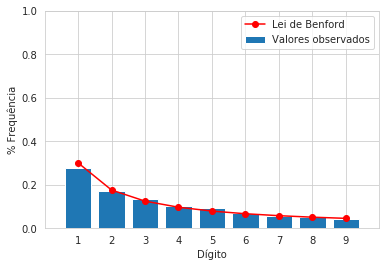

In [28]:
# Gráficos
def result_vs_benford(series):
    with sns.axes_style("whitegrid"):
      f, ax = plt.subplots()
      # Plot dos valores observados
      x_o = series.index.values.astype(int)
      y_o = series.values
      ax.bar(x_o, y_o, label="Valores observados")

      # Plot da Lei de Bendford
      x = np.linspace(1, 9, 9)
      y = np.log10(1 + (1/x))
      ax.plot(x, y, '-or', label = "Lei de Benford")

      ax.set_xlabel("Dígito")
      ax.set_ylabel("% Frequência")
      ax.set_xticks(x_o)
      ax.set_ylim((0, 1))
      ax.set_xlim((0, 10))
      ax.legend(frameon=True)
    
result_vs_benford(first_digit_freq["Porcentagem"])



Podemos ver que os resultados estão bem próximos do descrito pela Lei de Benford. Então podemos concluir que eles seguem essa lei, correto?

Não. Até agora, estávamos qualificando os resultados de maneira bastante **subjetiva**. Entretanto, se quisermos tirar alguma conclusão relevante, temos que ter métricas sofiticadas que deem crédito para as nossas conclusões. Assim, vamos definir algumas métricas.



### Métricas

Mas de que forma podemos afirmar que essas distribuições são equivalentes? Para isso, vamos tentar verificar a veracidade da seguinte frase (**hipótese**), através das etapas descritas.

**Os dados possuem a distribuição definida pela Lei de Benford**

- Iremos ter **duas métricas** de quão similares são as distribuições.
  - Efetuar o **Chi-Square Test Statistic** dos dados obtidos e teóricos. Esse teste é dado pela seguinte equação.
$$\chi ^2 = \sum_{d=1}^{9}{\frac{(p(d)-f(d))^2}{f(d)}}$$
  - A **Mean Absolute Deviation ** que é a média de desvio absoluto. Dada pela equação abaixo.
  $$MAD = \frac{1}{9}\sum_{d=1}^{9}|p(d)-f(d)|$$
- Em ambas as métricas $p(d)$ é a probabilidade do dígito *d* ser observado e $f(d)$ é a propabilidade segundo a lei de Benford.

Muita coisa, não é? Os detalhes dessa metodologia está descrita [aqui](https://web.williams.edu/Mathematics/sjmiller/public_html/math/papers/st/YangLu.pdf).


Defini-se uma função para cada métrica e calcula o seu valor.

In [29]:
# Métricas
def chi_square_bl(data):
    """
    Retorna a métrica chi-square dos dados em relação a lei de benford.

    > data: Dados como pandas série.
    < chi_squared: Valor escalar da métrica.

    """
    # valores da lei de bendford para cada dígito
    x = np.linspace(1, 9, 9)
    y = np.log10(1 + (1/x))
    
    # Broadcasting
    chi_square = (data - y)**2 / y
    
    return chi_square.sum()

def mad_bl(data):
    """
    Retorna a métrica MAD dos dados em relação a lei de benford.

    > data: Dados como pandas série.
    < chi_squared: Valor escalar da métrica.

    """
    # valores da lei de bendford para cada dígito
    x = np.linspace(1, 9, 9)
    y = np.log10(1 + (1/x))
    
    # Broadcasting
    mad = np.abs(data - y) / 9
    
    return mad.sum()


chi_square_metric = chi_square_bl(first_digit_freq["Porcentagem"])
mad_metric = mad_bl(first_digit_freq["Porcentagem"])
print("Chi-Squared Statistic: " + str(chi_square_metric))
print(r"MAD: " + str(mad_metric))

Chi-Squared Statistic: 0.005684661910170813
MAD: 0.007175486635629027


### Resultados
As métricas serão usadas para tirarmos conclusões dos resultados.
As conclusões do valor de $\chi^2$ para **8 graus de liberdade** são retiradas da tabela abaixo.
<p align="center"> 
![Chi Square Distribution](https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/chi_square.png)
</p>

Dada a **hipótese nula inicial de que os valores seguem a mesma distribuição**. Só poderemos rejeitar esse hipótese se o valor encontrado da métrica corresponder a um valor de *p* que demontre relevância na rejeição (normalmente, p<0.05). 

Nesse caso, tivemos um valor de **0.005684** é bem menor que o 15.51 crítico da tabela (para um valor de p=0.05). Ou seja, estatiscamente, falamos que **não podemos rejeitar a hipótese nula de que os valores encontrados seguem a Lei de benford**.

Para a outra métrica temos a seguinte tabela.

Valor de MAD | Conformidade
---|---
0.000 - 0.004 | Próxima
0.004 - 0.008 | Aceitável
0.008 - 0.012 | Margialmente aceitável
> 0.012 | Não compatível

Seguindo a métrica **MAD** de **0.0072** temos que as distribuições possuem uma **Conformidade Aceitável**.

 <span style="color:blue">**Os resultados seguem a lei de Benford**!</span>

## 2. Dados dos Votos Válidos por Município
Agora, vamos assumir que o número de votos válidos por município tem um comportamento conforme a lei de Benford. 

Mais uma vez os dados foram coletados diretamento do site [TSE](http://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais) no dia 27 de Outubro de 2018.

### Visualização
Essa tabela possui outros valores bastante interessantes que ainda exploraremos mais adiantes. Porém, inicialmente, vamos aplicar os mesmo passos anteriores para os votos válidos...

In [30]:
# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/aecio_2014_2turn.csv"
votos = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

# Visualização
visualizar(votos)

,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"64,84"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"51,84"
2,AC,BRASILÉIA,Presidente,...,0,12435,"60,74"
3,AC,BUJARI,Presidente,...,0,5391,66
4,AC,CAPIXABA,Presidente,...,0,4958,"70,51"


### Limpeza/Filtragem
Dessa vez, não temos nenhum valor nulo. Então, vamos apenas filtrar a nossa coluna de interesse.

 - **Votos válidos**: Quantidade de votos válidos naquele município.
 

In [31]:
# Filtra os dados
col2 = "Votos válidos"

# Após o filtro
votos = filter_and_clean(votos, col2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701 entries, 0 to 5700
Data columns (total 1 columns):
Votos válidos    5701 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:105542273.0




,Votos válidos
0,6286
1,4082
2,12435
3,5391
4,4958


### Análise
De acordo com o [G1](http://g1.globo.com/politica/eleicoes/2014/apuracao-votos-presidente.html), 105.542.273 foi o número de votos válidos no segundo turno. Então, está tudo OK. 

Continuando a análise...

Valor mínimo: 7.0
Valor máximo: 6489779.0


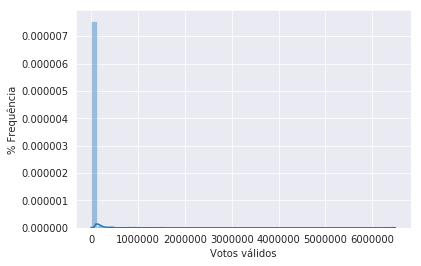

In [32]:
show_dist(votos, col2)

Mais uma vez, os valores possuem uma distribuição de cauda longa e de grande intervalo $[7, 6489779]$.

Assim, calculando as frequencia e plotandos os gráficos.

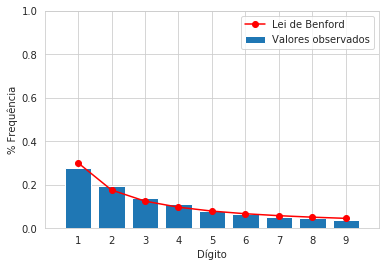

In [33]:
first_digit_freq_2 = fd_freq(votos, col2)

result_vs_benford(first_digit_freq_2["Porcentagem"])

### Métricas
Já podemos calcular as métricas.

In [34]:
chi_square_metric_2 = chi_square_bl(first_digit_freq_2["Porcentagem"])
mad_metric_2 = mad_bl(first_digit_freq_2["Porcentagem"])
print("Chi-Squared Statistic: " + str(chi_square_metric_2))
print(r"MAD: " + str(mad_metric_2))

Chi-Squared Statistic: 0.009546789546303468
MAD: 0.010093033457802906


### Resultados
Assim, temos que o teste $\chi^2$ não permite a rejeição da hipótese nula e que o **MAD** resulta em uma **Conformidade Margialmente Aceitável**.

<span style="color:blue">**Os resultados continuam seguindo a lei de Benford**!</span>

## 3. Dados dos Votos Nominais por Cadidato
Até agora estávamos implementando a lei em resultados essencialmente demográficos. Mas agora, vamos aplicá-la diretamente nos números que geraram os resultados das eleições. 

Dessa vez o conjunto de dados sendo analisado é o **número de votos válidos para cada candidato por município no segundo turno da eleição de 2014**. Como temos dois candidatos, vamos ter dois conjuntos de dados.


### Visualização
Mais uma vez, continuando o mesmo passo-a-passo dos outros exemplos.

In [35]:
# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/aecio_2014_2turn.csv"
aecio = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

# Visualização
visualizar(aecio)

# Colunas
print(aecio.columns)


,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"64,84"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"51,84"
2,AC,BRASILÉIA,Presidente,...,0,12435,"60,74"
3,AC,BUJARI,Presidente,...,0,5391,66
4,AC,CAPIXABA,Presidente,...,0,4958,"70,51"


Index(['UF', 'Município', 'Cargo', 'Turno', 'Situação totalização',
       'Votos nominais', 'Votos em trânsito', 'Votos válidos',
       '% votos válidos'],
      dtype='object')


In [36]:
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/dilma_2014_2turn.csv"
dilma = pd.read_csv(url, header=0, encoding='latin-1', sep=";")


# Visualização
visualizar(dilma)

# Colunas
print(dilma.columns)

,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"35,16"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"48,16"
2,AC,BRASILÉIA,Presidente,...,0,12435,"39,26"
3,AC,BUJARI,Presidente,...,0,5391,34
4,AC,CAPIXABA,Presidente,...,0,4958,"29,49"


Index(['UF', 'Município', 'Cargo', 'Turno', 'Situação totalização',
       'Votos nominais', 'Votos em trânsito', 'Votos válidos',
       '% votos válidos'],
      dtype='object')


### Limpeza/Filtragem
A coluna de interesse.

 - **Votos nominais**: Quantidade de votos válidos para o cadidato.

In [37]:
# Filtra os dados
col3 = "Votos nominais"


# Após o filtro
aecio = filter_and_clean(aecio, col3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701 entries, 0 to 5700
Data columns (total 1 columns):
Votos nominais    5701 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:51041155.0




,Votos nominais
0,4076
1,2116
2,7553
3,3558
4,3496


In [38]:
dilma = filter_and_clean(dilma, col3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 0 to 5699
Data columns (total 1 columns):
Votos nominais    5700 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:54501118.0




,Votos nominais
0,2210
1,1966
2,4882
3,1833
4,1462


Os dados batem com os divulgados pela [imprensa](http://g1.globo.com/politica/eleicoes/2014/apuracao-votos-presidente.html).
- **Aécio:** 51041155 votos.
- **Dilma:** 54501118 votos.

### Análise

Continuando a análise...

Valor mínimo: 5.0
Valor máximo: 4142529.0


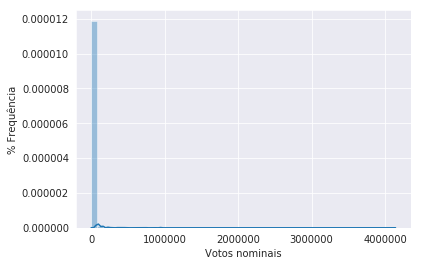

In [39]:
# Distribuições
show_dist(aecio, col3)

Valor mínimo: 1.0
Valor máximo: 2347250.0


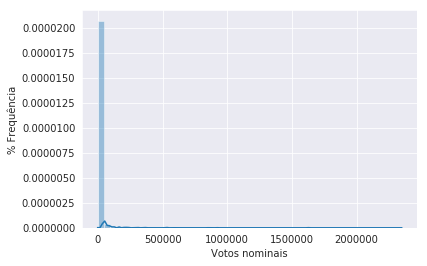

In [40]:
show_dist(dilma, col3)

Aqui os resultados são interessantes. Ambos os valores parecem ser uma distribuição de cauda longa, além de intervalo que varia na mesma ordem de grandeza $A\in[5, 4142529], D\in[1, 234725]$.

Por fim, calculando as frequencia e plotandos os gráficos.

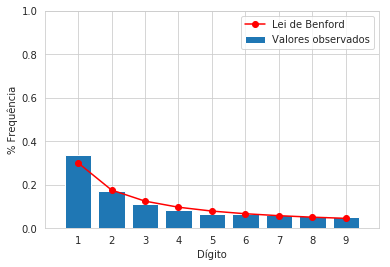

In [41]:
# Aécio
first_digit_freq_3 = fd_freq(aecio, col3)

result_vs_benford(first_digit_freq_3["Porcentagem"])

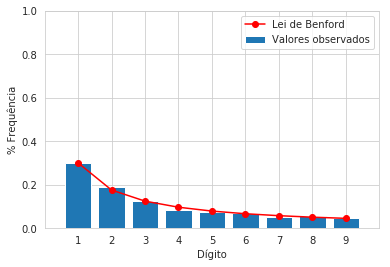

In [42]:
# Dilma
first_digit_freq_4 = fd_freq(dilma, col3)

result_vs_benford(first_digit_freq_4["Porcentagem"])

Hmmm, esses resultados parecem bem próximos do descrito pela lei de Benford. Mas pelas declarações do vídeo inicial, estáva esperando uns resultados mais divergente. Podemos ver que as distribuições não são exatamente idênticas e são consideravelmente diferentes am alguns pontos.

### Metricas
Vamos mensurar esses valores.

In [43]:
chi_square_metric_3 = chi_square_bl(first_digit_freq_3["Porcentagem"])
mad_metric_3 = mad_bl(first_digit_freq_2["Porcentagem"])
print("Chi-Squared Statistic: " + str(chi_square_metric_3))
print(r"MAD: " + str(mad_metric_3))

Chi-Squared Statistic: 0.011059217474682692
MAD: 0.010093033457802906


In [44]:
chi_square_metric_4 = chi_square_bl(first_digit_freq_4["Porcentagem"])
mad_metric_4 = mad_bl(first_digit_freq_2["Porcentagem"])
print("Chi-Squared Statistic: " + str(chi_square_metric_4))
print(r"MAD: " + str(mad_metric_4))

Chi-Squared Statistic: 0.004146984922826117
MAD: 0.010093033457802906


### Resultados

Por fim, temos que o teste $\chi^2$ não permite a rejeição da hipótese nula e que o **MAD** resulta em uma **Conformidade Margialmente Aceitável** para ambos os conjuntos de dados.

<span style="color:blue">**Ou seja, os resultados estão de acordo com a Lei de Benford**!</span>

# Conclusão

Nesses exemplos, foram usados algums dados das eleições brasileiras de 2014 para verificar a presença das Lei de Benford nesses números. Lembor que esse Notebook apresenta apenas alguns valores obtidos na eleição para análise, vários outros poderiam ser utilizados, como votos nulos ou branco. Pelo menos nos dados utilizados, nenhuma distribuição se mostrou fora do esperado.